Import Libraries

In [21]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

Load Dataset

In [14]:
df = pd.read_csv("../data/processed/cleaned_churn_data.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,29.85,29.85,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,1.0,0.0,1.0,...,56.95,1889.50,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,...,53.85,108.15,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,45.0,0.0,0.0,1.0,0.0,1.0,...,42.30,1840.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,70.70,151.65,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


Data Split

In [15]:
X = df.drop(columns="Churn")
y = df["Churn"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Scale Data

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic regression train

In [18]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:,1]

Model Evaluation

In [19]:
#Accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion Matrix:\n",cm)

#classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

#ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.7498813478879924
confusion Matrix:
 [[1142  405]
 [ 122  438]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.74      0.81      1547
         1.0       0.52      0.78      0.62       560

    accuracy                           0.75      2107
   macro avg       0.71      0.76      0.72      2107
weighted avg       0.80      0.75      0.76      2107

ROC-AUC Score: 0.7601729153199741


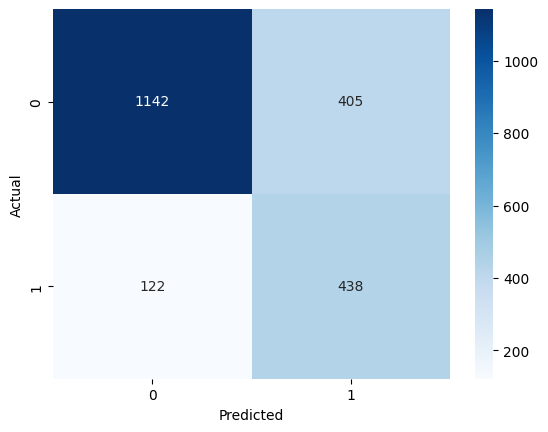

In [20]:
#plot

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
joblib.dump(lr, "../artifact/churn_model.pkl")
joblib.dump(scaler, "../artifact/scaler.pkl")

['../artifact/scaler.pkl']